# Taller 4 de agosto

**Andrés Ospina Patiño**

Con la serie que escogió para el taller 2 estime 5 modelos, y realice el proceso de validación y pronostico con ellos. Escoja y justifique cual de los modelos estimados es el mejor.

In [217]:
import datetime as dt
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error

In [218]:
### Load data
start = dt.datetime(2022, 1, 1)
end = dt.datetime(2022, 7, 26)

df = web.DataReader('AMZN', 'yahoo', start, end)
df.to_csv('AMZN.csv')
amzn = df['Close']
amzn_dif = (amzn - amzn.shift(1)).dropna()

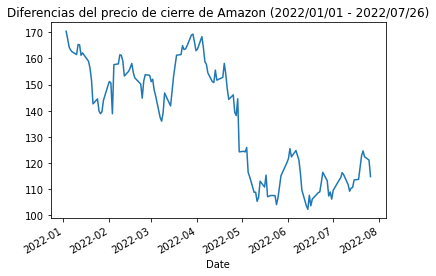

In [219]:
ax = amzn.plot(title="Diferencias del precio de cierre de Amazon (2022/01/01 - 2022/07/26)");

In [220]:
adfuller(amzn_dif)

(-11.860634528785273,
 6.860206589685757e-22,
 0,
 139,
 {'1%': -3.4782936965183815,
  '5%': -2.882567574015525,
  '10%': -2.5779830117488745},
 735.6880820534444)

In [221]:
kpss(amzn_dif)

/var/folders/2b/f60r175j3t14frh_7_hprgq00000gn/T/ipykernel_16425/3449853879.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss(amzn_dif)


(0.07228842309224856,
 0.1,
 1,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

Dado el p-valor obtenido en la prueba se rechaza la hipótesis nula (se rechaza la no estacionariedad de la serie) y el no rechazo de la estacionariedad en la prueba kpss se asume que se tiene una serie estacionaria. 

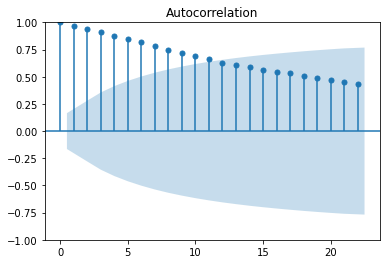

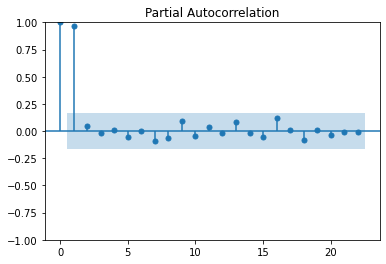

In [222]:
plot_acf(amzn)
plot_pacf(amzn)
plt.show()

### Estimación

In [223]:
train = amzn[:130]
test = amzn[130:]

In [224]:
mod_ar1 = ARIMA(train, order=(1,0,0));
mod_ar2 = ARIMA(train, order=(2,0,0));
mod_ma1 = ARIMA(train, order=(0,0,1));
mod_arima101 = ARIMA(train, order=(1,0,1));
mod_arima111 = ARIMA(train, order=(1,1,1));
mod_arima110 = ARIMA(train, order=(1,1,0));

/Users/andresospinapatino/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/andresospinapatino/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/andresospinapatino/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/andresospinapatino/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no

In [225]:
ar_1 = mod_ar1.fit()
ar_2 = mod_ar2.fit()
ma_1 = mod_ma1.fit()
arima_101 = mod_arima101.fit()
arima_111 = mod_arima111.fit()
arima_110 = mod_arima110.fit()

In [226]:
ar_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  100
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -299.535
Date:                Wed, 10 Aug 2022   AIC                            605.071
Time:                        18:02:54   BIC                            612.886
Sample:                             0   HQIC                           608.234
                                - 100                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        142.4416     16.243      8.769      0.000     110.605     174.278
ar.L1          0.9801      0.036     27.464      0.000       0.910       1.050
sigma2        22.6582      1.850     12.246      0.000      19.032      26.285
===================================================================================
Ljung-Box (L1) (Q):                   0.86   Jarque-Bera (JB):                69.70
Prob(Q):                              0.35   Prob(JB):                         0.00
Heteroskedasticity (H):               1.18   Skew:                            -0.19
Prob(H) (two-sided):                  0.64   Kurtosis:                         7.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [227]:
ar_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  100
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -299.274
Date:                Wed, 10 Aug 2022   AIC                            606.548
Time:                        18:02:54   BIC                            616.969
Sample:                             0   HQIC                           610.766
                                - 100                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        141.9346     18.167      7.813      0.000     106.329     177.540
ar.L1          0.9093      0.126      7.242      0.000       0.663       1.155
ar.L2          0.0732      0.122      0.602      0.547      -0.165       0.312
sigma2        22.5245      2.925      7.701      0.000      16.792      28.257
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                50.85
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               1.17   Skew:                            -0.19
Prob(H) (two-sided):                  0.66   Kurtosis:                         6.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [228]:
ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  100
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -383.422
Date:                Wed, 10 Aug 2022   AIC                            772.844
Time:                        18:02:54   BIC                            780.659
Sample:                             0   HQIC                           776.007
                                - 100                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        146.1877      2.550     57.323      0.000     141.189     151.186
ma.L1          0.8410      0.049     17.339      0.000       0.746       0.936
sigma2       123.7519     20.714      5.974      0.000      83.153     164.351
===================================================================================
Ljung-Box (L1) (Q):                  38.85   Jarque-Bera (JB):                14.44
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               3.07   Skew:                            -0.92
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [229]:
arima_101.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  100
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -299.297
Date:                Wed, 10 Aug 2022   AIC                            606.593
Time:                        18:02:54   BIC                            617.014
Sample:                             0   HQIC                           610.811
                                - 100                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        141.9507     18.222      7.790      0.000     106.236     177.666
ar.L1          0.9837      0.034     29.357      0.000       0.918       1.049
ma.L1         -0.0682      0.124     -0.551      0.582      -0.311       0.174
sigma2        22.5372      2.897      7.779      0.000      16.859      28.216
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                52.40
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):               1.17   Skew:                            -0.19
Prob(H) (two-sided):                  0.66   Kurtosis:                         6.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [230]:
arima_111.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  100
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -294.752
Date:                Wed, 10 Aug 2022   AIC                            595.504
Time:                        18:02:54   BIC                            603.290
Sample:                             0   HQIC                           598.654
                                - 100                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6339      0.746     -0.850      0.395      -2.095       0.827
ma.L1          0.5574      0.784      0.711      0.477      -0.978       2.093
sigma2        22.5687      2.850      7.920      0.000      16.984      28.154
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                55.59
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               1.17   Skew:                            -0.13
Prob(H) (two-sided):                  0.66   Kurtosis:                         6.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [231]:
arima_110.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  100
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -294.875
Date:                Wed, 10 Aug 2022   AIC                            593.749
Time:                        18:02:54   BIC                            598.939
Sample:                             0   HQIC                           595.849
                                - 100                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0853      0.119     -0.720      0.472      -0.318       0.147
sigma2        22.6262      2.858      7.916      0.000      17.024      28.228
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                50.36
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               1.16   Skew:                            -0.14
Prob(H) (two-sided):                  0.68   Kurtosis:                         6.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Teniendo en cuenta el FACE y el FACPE se asume que el modelo que mejor representa la serie es el AR(1), a partir de lo cual se proponen los diferentes modelos. Teniendo en cuenta los valores de los diferentess criterios de infomración, se evidencia como el mejor modelo es el ARIMA(1,1,0), pues cuenta con los menores criterios de información, seguido del ARIMA(1,1,1), lo que es extraño puesto que en las graficas de la función de auto-correlación no se evidenciaba componente MA.

### Validación

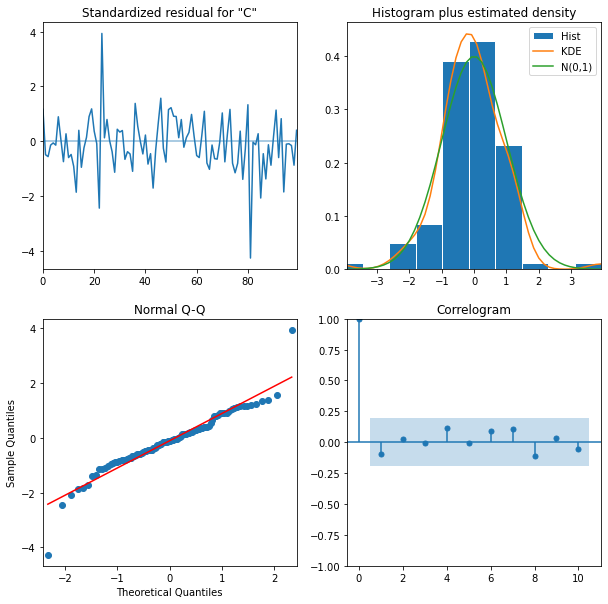

In [232]:
ar_1.plot_diagnostics(figsize=(10, 10))
plt.show()

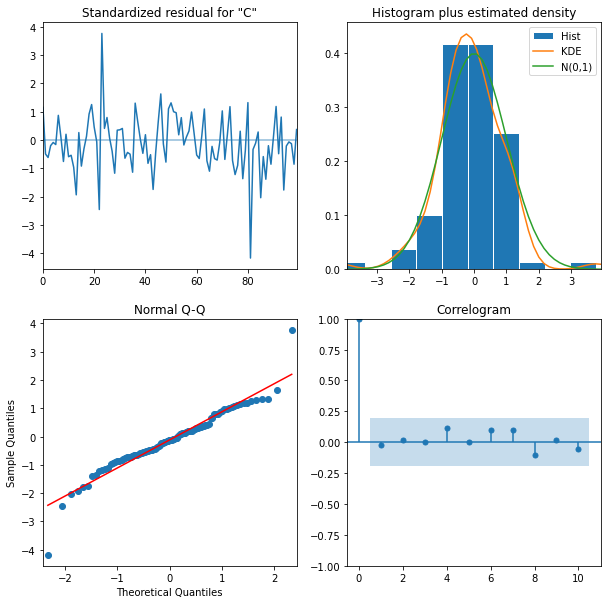

In [233]:
ar_2.plot_diagnostics(figsize=(10, 10))
plt.show()

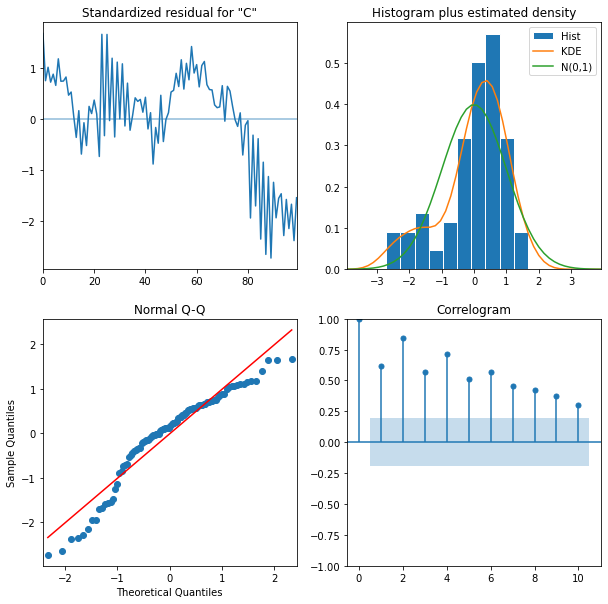

In [234]:
ma_1.plot_diagnostics(figsize=(10, 10))
plt.show()

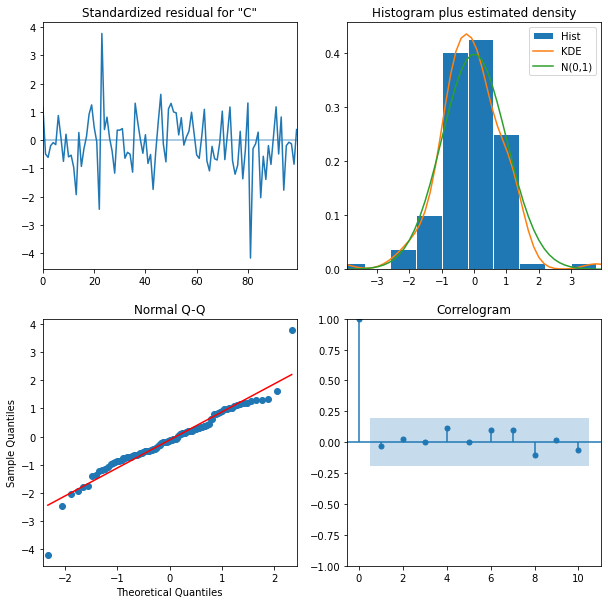

In [235]:
arima_101.plot_diagnostics(figsize=(10, 10))
plt.show()

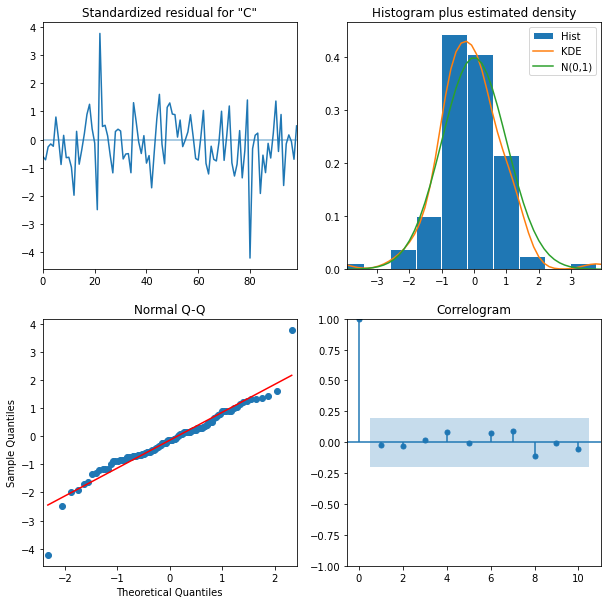

In [236]:
arima_111.plot_diagnostics(figsize=(10, 10))
plt.show()

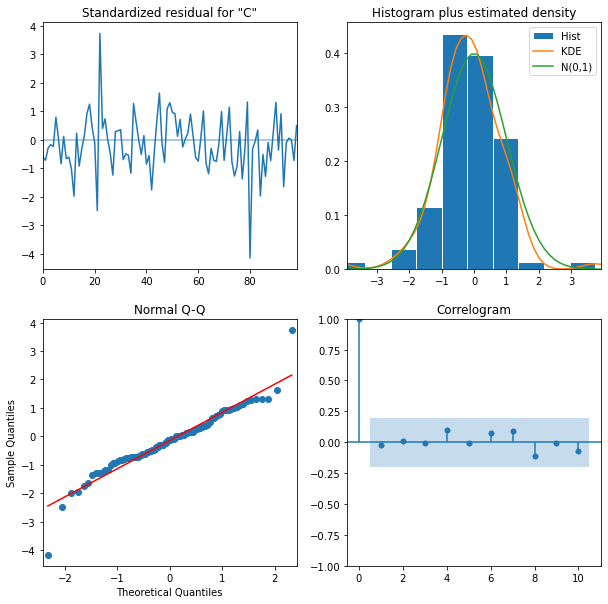

In [237]:
arima_110.plot_diagnostics(figsize=(10, 10))
plt.show()

Por otro lado, se observa que en general los residuos son ruido blanco y poco correlacionados, exceptuando el MA(1). No se tienen coeficientes significativos en los ARIMA, por lo tanto el modelo que cumple con más criterios es el AR(1), aunque este presenta un coeficiente cercano a 1, lo que indica que puede llegar a tener problemas en estacionariedad e invertibilidad.

### Predicción

/Users/andresospinapatino/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


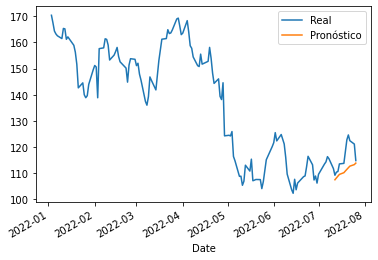

In [267]:
amzn.plot(label="Real")
ar_1.forecast(steps=11).set_axis(amzn.index[130:]).plot(label="Pronóstico")
plt.legend()

Finalmente se procede a predecir los ultimos once valores con el modelo más adecuado teniendo en cuenta la validación. En general la predección no es mala teniendo en ceunta que se trata de un AR(1), el cual tiende a ir a la media.